## Credit Cart Fraud Detection 

#### *by Massimiliano, Pierpaolo & Eddie*

### Table of contents

* [0. **Packages** import and **evaluating functions**](#section_0)

* [1. **Preprocessing** & **Visualization**](#chapter1)
    * [1.1 Time variable trasformation](#section_1_1)
    * [1.2 Graphs](#section_1_2)
    
* [2. **Standardization** and **Train test split**](#chapter2)

* [3. **Parametric** Models](#chapter3)
     * [3.1 Logistic Regression](#section_3_1)
     * [3.2 Ridge regression classifier](#section_3_2)
     * [3.3 Support Vector Machine](#section_3_3)
     * [3.4 Discriminant Analysis](#section_3_4)
* [4. **Non parametric** Models](#chapter4)

* [5. **Neural networks**](#chapter5)

* [6. Conclusions](#chapter6)

### 0. **Packages** import and **evaluating functions** <a class="anchor" id="section_0"></a>

In [1]:
# import basic packages

import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_fscore_support

In [2]:
# def function for evaluating model marginal distribution

def evaluate_model_marginal(y_true, y_pred, model_name, round_ = 3):
    
    cnf_matrix = confusion_matrix(y_true,y_pred)
    cm_marginal = cnf_matrix/cnf_matrix.sum(axis=0)
    
    print('{} detects {}% of frauds and {}% of non frauds'.format(model_name, cm_marginal.round(round_)[1][1]*100,cm_marginal.round(round_)[0][0]*100))

In [3]:
# def function for evaluating models

def evaluate_model_prediction(y_true, y_pred):
    
    pr,rc,f1,su = precision_recall_fscore_support(y_true, y_pred, average='binary')
    
    print("""
    ----------------------------------------------------
    -Precision: {}
    -Recall: {}
    -F1 score: {}
    ----------------------------------------------------
    
    Confusion matrix:""".format(pr,rc,f1))
    
    sizeplots = (5,5)
    plt.figure(figsize=sizeplots)

    cm = confusion_matrix(y_true, y_pred)

    sns.heatmap(cm,
                fmt= ".5g",
                annot=True,
                annot_kws={"size": 15},
                cmap = sns.cubehelix_palette(start=2, rot=0, dark=0.05, light=.95, reverse=False, as_cmap=True),
                xticklabels=['Not Fraud', 'Fraud'],
                yticklabels=['Not Fraud', 'Fraud'])
    plt.xlabel("Predicted label")
    plt.ylabel("True label")

### 1. **Preprocessing** & **Visualization** <a class="anchor" id="chapter1"></a>

In [4]:
# import & show data

data = pd.read_csv('./data/creditcard.csv')
data.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
# show that V variables are result of PCA transformation

data_pca = data.iloc[:,1:29]
data_pca.corr().round(decimals=1)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28
V1,1.0,0.0,-0.0,0.0,0.0,0.0,0.0,-0.0,0.0,0.0,...,0.0,0.0,-0.0,0.0,0.0,0.0,-0.0,-0.0,0.0,0.0
V2,0.0,1.0,0.0,-0.0,-0.0,0.0,0.0,-0.0,-0.0,-0.0,...,0.0,-0.0,0.0,0.0,0.0,-0.0,-0.0,0.0,-0.0,-0.0
V3,-0.0,0.0,1.0,-0.0,-0.0,0.0,0.0,0.0,-0.0,0.0,...,0.0,-0.0,-0.0,0.0,0.0,-0.0,0.0,0.0,0.0,0.0
V4,0.0,-0.0,-0.0,1.0,-0.0,-0.0,0.0,0.0,0.0,0.0,...,-0.0,-0.0,-0.0,0.0,0.0,0.0,0.0,-0.0,-0.0,-0.0
V5,0.0,-0.0,-0.0,-0.0,1.0,0.0,-0.0,0.0,0.0,-0.0,...,-0.0,0.0,-0.0,0.0,0.0,-0.0,0.0,0.0,0.0,-0.0
V6,0.0,0.0,0.0,-0.0,0.0,1.0,0.0,-0.0,0.0,0.0,...,0.0,0.0,-0.0,-0.0,-0.0,-0.0,0.0,-0.0,-0.0,0.0
V7,0.0,0.0,0.0,0.0,-0.0,0.0,1.0,-0.0,0.0,0.0,...,-0.0,0.0,0.0,-0.0,0.0,-0.0,0.0,-0.0,-0.0,-0.0
V8,-0.0,-0.0,0.0,0.0,0.0,-0.0,-0.0,1.0,0.0,0.0,...,-0.0,-0.0,-0.0,0.0,0.0,-0.0,-0.0,-0.0,0.0,-0.0
V9,0.0,-0.0,-0.0,0.0,0.0,0.0,0.0,0.0,1.0,-0.0,...,0.0,-0.0,0.0,0.0,0.0,-0.0,0.0,-0.0,-0.0,0.0
V10,0.0,-0.0,0.0,0.0,-0.0,0.0,0.0,0.0,-0.0,1.0,...,0.0,-0.0,0.0,-0.0,0.0,-0.0,-0.0,-0.0,-0.0,-0.0


We notice that the 28 "V variables" era not correlated. We can suppose that this variables are the result of a PCA transformation of original data.

#### 1.1 Time variable trasformation <a class="anchor" id="section_1_1"></a>

In [6]:
# make time column useful, transform it in 24h

data['Time'] = data['Time'].apply(lambda x: int(np.ceil(float(x)/3600) % 24))

#### 1.2 Graphs <a class="anchor" id="section_1_2"></a>

<AxesSubplot:title={'left':'Fraud vs Non frauds Amount with no outliers'}, xlabel='Amount', ylabel='Class'>

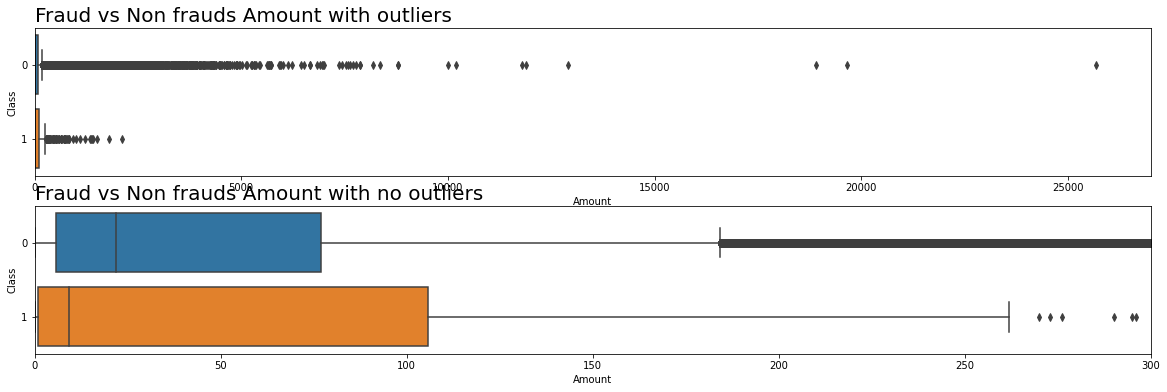

In [7]:
# Fraud vs Non frauds Amount of transaction
f, ax = plt.subplots(2,1,figsize=(20, 6))

ax[0].set_title('Fraud vs Non frauds Amount with outliers',fontsize = 20,loc='left')
ax[0].set(xlim=(0, 27000))
sns.boxplot(data.Amount,data.Class, ax = ax[0], orient= 'h')

ax[1].set_title('Fraud vs Non frauds Amount with no outliers',fontsize = 20, loc='left')
ax[1].set(xlim=(0, 300))
sns.boxplot(data.Amount,data.Class, ax = ax[1], orient= 'h')

We compare the amount of transactions in the two classes and we notice that frauds (Class=1) are more variable. The average fraud amount in smaller than legit transaction amounts, this happens becouse there are a lot of small amount frauds that make the distribution left-skewed.

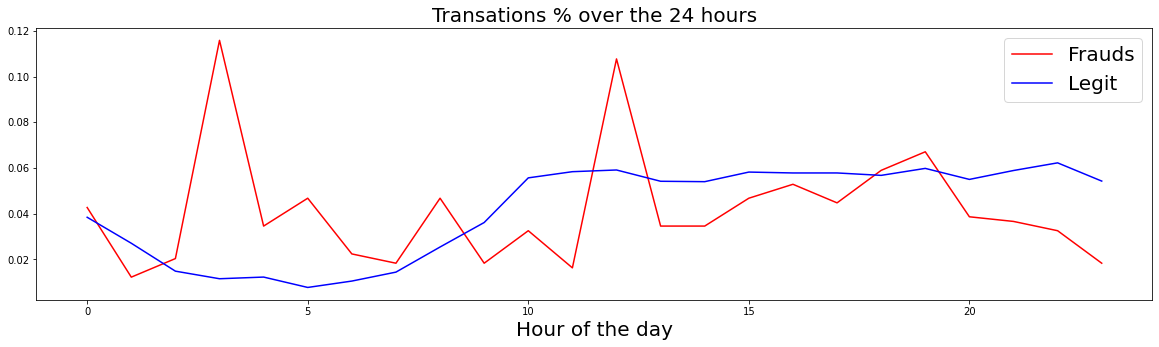

In [8]:
### create pivot table for creating the plot
t_over_time = data.pivot_table(values='Amount',index='Time',columns='Class',aggfunc='count')
# create rel columns
t_over_time['fraud_perc'] =  t_over_time[1]/t_over_time[1].sum()
t_over_time['norm_perc'] =  t_over_time[0]/t_over_time[0].sum()
# del abs columns
t_over_time.drop(0, axis=1, inplace=True)
t_over_time.drop(1, axis=1, inplace=True)

# plot
plt.figure(figsize=(20,5))
plt.title('Transations % over the 24 hours',fontsize=20)
plt.plot(t_over_time.index, t_over_time.fraud_perc, c = 'r', label = 'Frauds')
plt.plot(t_over_time.index, t_over_time.norm_perc, c = 'b', label = 'Legit')
plt.xlabel('Hour of the day',fontsize=20)
plt.legend(fontsize=20)

With this lineplot we can notice that there are frauds distributed in every hour. The legit transactions are done mostly during the daily hours.

Text(0, 0.5, 'Third component')

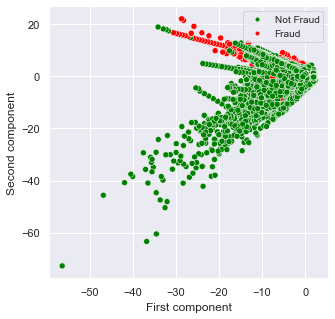

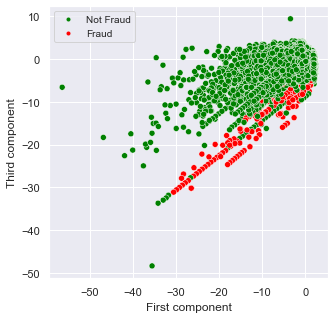

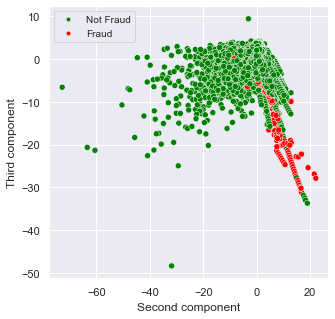

In [9]:
from matplotlib.lines import Line2D

sns.set_theme()
sizeplots = (5,5)
sizelegend = 10
##########################################
#First Plot
plt.figure(figsize=sizeplots)

plot = sns.scatterplot(x = data["V1"],
                y = data["V2"],
                hue = data["Class"],
                palette = ["green", "red"],
                legend = False)

custom = [Line2D([], [], marker='.', color='green', linestyle='None'),
          Line2D([], [], marker='.', color='red', linestyle='None')]
plt.legend(custom, ["Not Fraud", "Fraud"], prop={'size': sizelegend})
plt.xlabel("First component")
plt.ylabel("Second component")

##########################################
#Second Plot
plt.figure(figsize=sizeplots)

sns.scatterplot(x = data["V1"],
                y = data["V3"],
                hue = data["Class"],
                palette = ["green", "red"],
                legend = False)

custom = [Line2D([], [], marker='.', color='green', linestyle='None'),
          Line2D([], [], marker='.', color='red', linestyle='None')]
plt.legend(custom, ["Not Fraud", "Fraud"], prop={'size': sizelegend})
plt.xlabel("First component")
plt.ylabel("Third component")

##########################################
#Third Plot
plt.figure(figsize=sizeplots)

sns.scatterplot(x = data["V2"],
                y = data["V3"],
                hue = data["Class"],
                palette = ["green", "red"],
                legend = False)

custom = [Line2D([], [], marker='.', color='green', linestyle='None'),
          Line2D([], [], marker='.', color='red', linestyle='None')]
plt.legend(custom, ["Not Fraud", "Fraud"], prop={'size': sizelegend})
plt.xlabel("Second component")
plt.ylabel("Third component")

It seems that there are some patterns in the frauds, but must be considered that the dataset is higly unbalaced.

### 2. **Standardization** and **Train test split** <a class="anchor" id="chapter2"></a>

We need to standardize all the variables becouse of *time* and *amount* features. As we have seen in ghraphs *amount* contains highly variable values.

In [10]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# split features and target 

X = data.iloc[:,:-1]
y = data["Class"]
print("The features are: {}".format(list(X.columns)))
print("The variable of interest is: {}\n".format(y.name))

# scale features

scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

# train test split wiuth sklearn package mantaining y proportion of classes
'''Stratify = y: It is desirable to split the dataset into train and test sets in a way that preserves the same proportions of examples in each class as observed in the original dataset.'''

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size = 0.3, random_state = 0)

print("Number of samples of train set: {}".format(len(y_train)))
print("Number of frauds in train set: {}".format(y_train.value_counts()[1]))
print("Number of samples of test set: {}".format(len(y_test)))
print("Number of frauds in test set: {}".format(y_test.value_counts()[1]))

The features are: ['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount']
The variable of interest is: Class

Number of samples of train set: 199364
Number of frauds in train set: 344
Number of samples of test set: 85443
Number of frauds in test set: 148


### 3. **Parametric** Models <a class="anchor" id="chapter3"></a>

#### 3.1 Logistic Regression <a class="anchor" id="section_3_1"></a>

Logistic regression detects 86.5% of frauds and 99.9% of non frauds

    ----------------------------------------------------
    -Precision: 0.8653846153846154
    -Recall: 0.6081081081081081
    -F1 score: 0.7142857142857144
    ----------------------------------------------------
    
    Confusion matrix:


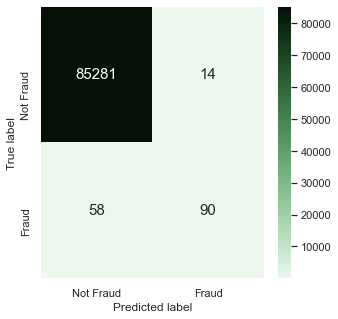

In [11]:
from sklearn.linear_model import LogisticRegression

# fit and evaluate logistic regression

lr_model = LogisticRegression(random_state = 0)
lr_model.fit(X_train,y_train)
pred_lr = lr_model.predict(X_test)

evaluate_model_marginal(y_test, pred_lr, 'Logistic regression')
evaluate_model_prediction(y_test, pred_lr)

Logistic regression gives us a quite good prediction of frauds. The recall is a problem because we don't want that frauds are classified as legit transactions. So we will look for a model with a better recall value.

#### 3.2 Ridge Regression Classifier <a class="anchor" id="section_3_2"></a>

Ridge regression is a technique for analyzing multiple regression data that suffer from multicollinearity. When multicollinearity occurs, least squares estimates are unbiased, but their variances are large so they may be far from the true value.

Ridge regression classifier with default alpha detects 79.7% of frauds and 99.9% of non frauds

    ----------------------------------------------------
    -Precision: 0.7972972972972973
    -Recall: 0.39864864864864863
    -F1 score: 0.5315315315315315
    ----------------------------------------------------
    
    Confusion matrix:


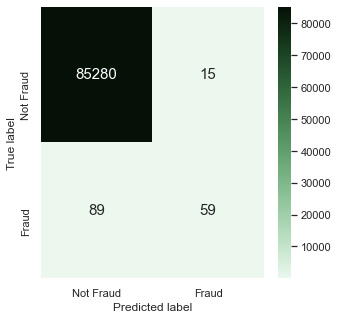

In [12]:
from sklearn.linear_model import RidgeClassifier

# fit and evaluate ridge regression classifier with default alpha

rr_model = RidgeClassifier(alpha=1.0, random_state=0)
rr_model.fit(X_train,y_train)
pred_rr = rr_model.predict(X_test)

evaluate_model_marginal(y_test, pred_rr, 'Ridge regression classifier with default alpha')
evaluate_model_prediction(y_test, pred_rr)

In [13]:
# fit and evaluate ridge regression with parameter search

alpha_parameters = [1e-3, 1e-2, 1e-1, 1, 10, 100]
for a in alpha_parameters:
        prediction = RidgeClassifier(alpha=a, random_state=0).fit(X_train,y_train).predict(X_test)
        pr,rc,f1,su = precision_recall_fscore_support(y_test, prediction, average='binary')
        print("""
        Ridge regression with alpha = {} has precision {} and recall: {} 
        """.format(a,pr.round(3),rc.round(3)))
#         cnf_matrix = confusion_matrix(y_test,prediction)
#         cm_marginal = cnf_matrix/cnf_matrix.sum(axis=0)
#         evaluate_model_marginal(y_test, prediction, f'Ridge classifier with alpha = {a}', round_ = 6)


        Ridge regression with alpha = 0.001 has precision 0.797 and recall: 0.399 
        

        Ridge regression with alpha = 0.01 has precision 0.797 and recall: 0.399 
        

        Ridge regression with alpha = 0.1 has precision 0.797 and recall: 0.399 
        

        Ridge regression with alpha = 1 has precision 0.797 and recall: 0.399 
        

        Ridge regression with alpha = 10 has precision 0.797 and recall: 0.399 
        

        Ridge regression with alpha = 100 has precision 0.797 and recall: 0.399 
        


Even if we searched for the best parameter the ridge regression classiefier performs worst than the logistic one. 

#### 3.3 Support Vector Machine <a class="anchor" id="section_3_3"></a>

In addition to performing linear classification, SVMs can efficiently perform a non-linear classification using what is called the kernel trick, implicitly mapping their inputs into high-dimensional feature spaces.

Support Vector Machine (C default) detects 96.6% of frauds and 99.9% of non frauds

    ----------------------------------------------------
    -Precision: 0.9659090909090909
    -Recall: 0.5743243243243243
    -F1 score: 0.7203389830508473
    ----------------------------------------------------
    
    Confusion matrix:


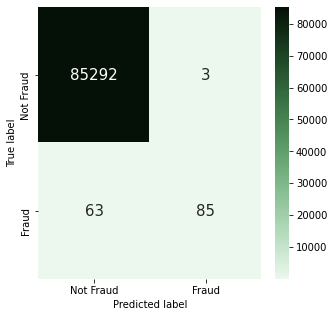

In [24]:
from sklearn import svm

# fit and evaluate support vector machine with default c & default kernel

svm_model = svm.SVC(random_state = 0)
svm_model.fit(X_train,y_train)
pred_svm = svm_model.predict(X_test)

evaluate_model_marginal(y_test, pred_svm, 'Support Vector Machine (C default)')
evaluate_model_prediction(y_test, pred_svm)

After a 20 minutes train we find a model with very good precision that predicts only 3 false positives. The problem is that the recall is too low and we want a high recall value. So this type of model isn't useful for our pourposes.

In [11]:
#fit and evaluate support vector machine with parameter search

# k_ = ['poly', 'rbf', 'sigmoid']
# c_ = [1,5,10,25]
# for k in k_:
#     for c in c_:
#         svm_model = svm.SVC(C = c, kernel = k, random_state = 0)
#         svm_model.fit(X_train,y_train)
#         pred_svm = svm_model.predict(X_test)
        
#         pr,rc,f1,su = precision_recall_fscore_support(y_test, pred_svm, average='binary')
#         print("""
#         Svm with kernel = {} and C = {}
#         Precision: {} Recall: {} 
#         ----------------------------------------------------
#         """.format(k,c,pr,rc))

'fit and evaluate support vector machine with parameter search'

With this parameter search, after a 3 hours long train we find models with high precision an very bad recall. So they are not useful for fraud detection.

#### 3.4 Discriminant analysis  <a class="anchor" id="section_3_4"></a>

Linear discriminant analysis (LDA) or Quadratic discriminant analysis (QDA) is a method used in statistics and other fields, to find a linear combination of features that characterizes or separates two or more classes of objects or events. The resulting combination may be used as a classifier. LDA and QDA is also closely related to principal component analysis (PCA) and factor analysis in that they both look for linear combinations of variables which best explain the data

LDA with eigen solver detects 85.7% of frauds and 99.9% of non frauds

    ----------------------------------------------------
    -Precision: 0.8571428571428571
    -Recall: 0.6891891891891891
    -F1 score: 0.7640449438202247
    ----------------------------------------------------
    
    Confusion matrix:


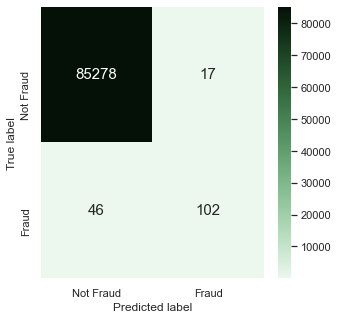

In [17]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# LDA with eigen solver

lda_model = LinearDiscriminantAnalysis(solver='eigen')
lda_model.fit(X_train,y_train)
pred_lda = lda_model.predict(X_test)

evaluate_model_marginal(y_test, pred_lda, 'LDA with eigen solver')
evaluate_model_prediction(y_test, pred_lda)

LDA with lsqr solver detects nan% of frauds and 99.8% of non frauds

    ----------------------------------------------------
    -Precision: 0.8571428571428571
    -Recall: 0.6891891891891891
    -F1 score: 0.7640449438202247
    ----------------------------------------------------
    
    Confusion matrix:


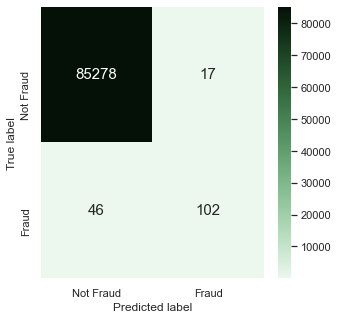

In [16]:
# LDA with lsqr solver

lda2_model = LinearDiscriminantAnalysis(solver='lsqr')
lda2_model.fit(X_train,y_train)
pred_lda2 = lda2_model.predict(X_test)

evaluate_model_marginal(y_test, pred_lda, 'LDA with lsqr solver')
evaluate_model_prediction(y_test, pred_lda2)

LDA with lsqr solver detects 85.7% of frauds and 99.9% of non frauds

    ----------------------------------------------------
    -Precision: 0.058363970588235295
    -Recall: 0.8581081081081081
    -F1 score: 0.10929432013769363
    ----------------------------------------------------
    
    Confusion matrix:


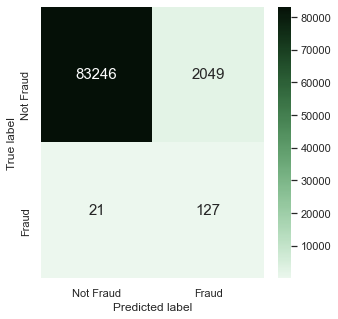

In [19]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

# QDA with default regularization param

qda_model = QuadraticDiscriminantAnalysis(reg_param=0)
qda_model.fit(X_train,y_train)
pred_qda = qda_model.predict(X_test)

evaluate_model_marginal(y_test, pred_lda, 'LDA with lsqr solver')
evaluate_model_prediction(y_test, pred_qda)

In [46]:
for r in list(np.arange(0.0, 1.5, 0.1).round(2)):    
    pred_qda = QuadraticDiscriminantAnalysis(reg_param=r).fit(X_train,y_train).predict(X_test)

    pr,rc,f1,su = precision_recall_fscore_support(y_test, pred_qda, average='binary')
    print("""QDA with parameter = {} has ---> Precision: {} Recall: {}""".format(r,pr,rc))

 Svm with parameter = 0.0 has ---> Precision: 0.058363970588235295 Recall: 0.8581081081081081
 Svm with parameter = 0.1 has ---> Precision: 0.054389721627408995 Recall: 0.8581081081081081
 Svm with parameter = 0.2 has ---> Precision: 0.052217157065893076 Recall: 0.8513513513513513
 Svm with parameter = 0.3 has ---> Precision: 0.051365674684060336 Recall: 0.8513513513513513
 Svm with parameter = 0.4 has ---> Precision: 0.05048465266558966 Recall: 0.8445945945945946
 Svm with parameter = 0.5 has ---> Precision: 0.050464271295922486 Recall: 0.8445945945945946
 Svm with parameter = 0.6 has ---> Precision: 0.05093724531377343 Recall: 0.8445945945945946
 Svm with parameter = 0.7 has ---> Precision: 0.053671103477887505 Recall: 0.8445945945945946
 Svm with parameter = 0.8 has ---> Precision: 0.0630401626842908 Recall: 0.8378378378378378
 Svm with parameter = 0.9 has ---> Precision: 0.09164818920916482 Recall: 0.8378378378378378
 Svm with parameter = 1.0 has ---> Precision: 0.8521739130434782 

The only regularization parameter with a decent model is 1.0 that was the default one in previous models.

### 4. **Non parametric** Models <a class="anchor" id="chapter4"></a>

### 4.1 Tree based methods


    ----------------------------------------------------
    -Precision: 0.7971014492753623
    -Recall: 0.7432432432432432
    -F1 score: 0.7692307692307693
    ----------------------------------------------------
    
    Confusion matrix:


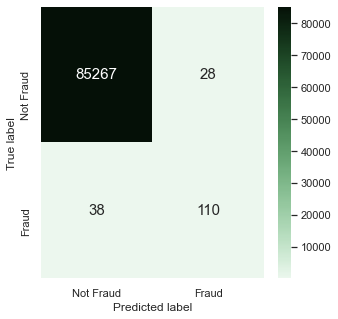

In [12]:
# Tree with sklearn's default tuning parameter - Full tree

from sklearn.tree import DecisionTreeClassifier

dt_default = DecisionTreeClassifier(random_state = 0) #uses gini impurity instead of entropy
dt_default.fit(X_train, y_train)
y_pred = dt_default.predict(X_test)
evaluate_model_prediction(y_test, y_pred)

The default decision tree classifies correctly almost all the non fraudolent transactions, and the 79% of the fraudolent predictions.

In [13]:
# Tree with tuning parameters optimization - Pruned tree

###################
#Around 7 minutes!#
###################

from sklearn.model_selection import ParameterGrid
from sklearn.metrics import f1_score
from tqdm.notebook import tqdm

#Extract a portion of the train set for evaluating the best hyperparameters configuration
#using directly the test set would be unfair! B
#This because we will compare, in order to find the best model, all the models and using here the test 
#wound give an unfair advantage to this model
X_train_little, X_val, y_train_little, y_val = train_test_split(X, y, test_size = 0.3, random_state = 0)

dt = DecisionTreeClassifier(random_state = 0)

param_grid = ParameterGrid({
    'max_depth': np.arange(5, 32,4),
    'min_samples_leaf': 2 ** np.arange(5),
    "min_impurity_decrease": 10 ** np.arange(-5,-3,0.5)
})

results = []

for params in tqdm(param_grid):
    dt.set_params(**params)
    dt.fit(X_train_little, y_train_little)
    y_pred = dt.predict(X_val)
    params["f1_score"] = f1_score(y_val, y_pred)
    results.append(params)
    
results = pd.DataFrame(results)

#we want the model with the best f1score, in case of tie we choose the more parsimonious (Occam's razor)
results = results.sort_values(["f1_score","max_depth","min_impurity_decrease","min_samples_leaf"],                                        ascending = [False,True,False,False])
results.head(10)

,max_depth,min_impurity_decrease,min_samples_leaf,f1_score
21,9,0.00001,2,0.837736
20,9,0.00001,1,0.837736
41,13,0.00001,2,0.837736
40,13,0.00001,1,0.837736
61,17,0.00001,2,0.837736
60,17,0.00001,1,0.837736
81,21,0.00001,2,0.837736
80,21,0.00001,1,0.837736
101,25,0.00001,2,0.837736
100,25,0.00001,1,0.837736



    ----------------------------------------------------
    -Precision: 0.9262295081967213
    -Recall: 0.7635135135135135
    -F1 score: 0.837037037037037
    ----------------------------------------------------
    
    Confusion matrix:


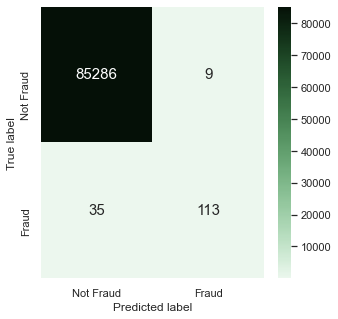

In [14]:
best_params = param_grid[results.index[0]]
dt.set_params(**best_params)
dt.fit(X_train, y_train) #train the best configured tree on the entire train set
y_pred = dt.predict(X_test)

evaluate_model_prediction(y_test, y_pred)

The optimazed tree performs better than the default one, maintaining almost all the not fradolent guesses correct (very little improvement), and increasing the amount of instances correctly classified as frauds up to 93%


    ----------------------------------------------------
    -Precision: 0.9626168224299065
    -Recall: 0.6959459459459459
    -F1 score: 0.8078431372549019
    ----------------------------------------------------
    
    Confusion matrix:


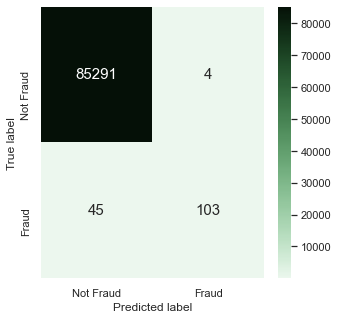

In [15]:
# Random forest - default trees

from sklearn.ensemble import RandomForestClassifier

rf_default = RandomForestClassifier(n_estimators=10, random_state = 0, bootstrap = True)
rf_default.fit(X_train, y_train)
y_pred = rf_default.predict(X_test)
evaluate_model_prediction(y_test, y_pred)


    ----------------------------------------------------
    -Precision: 0.9375
    -Recall: 0.6081081081081081
    -F1 score: 0.7377049180327868
    ----------------------------------------------------
    
    Confusion matrix:


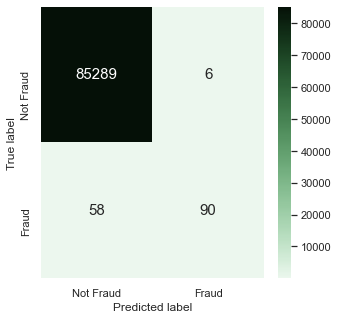

In [16]:
# Random forest - optimal trees

rf_optimized = RandomForestClassifier(n_estimators=100, random_state = 0, bootstrap = True)
rf_optimized.set_params(**best_params)
rf_optimized.fit(X_train, y_train)
y_pred = rf_optimized.predict(X_test)
evaluate_model_prediction(y_test, y_pred)


    ----------------------------------------------------
    -Precision: 0.9120879120879121
    -Recall: 0.5608108108108109
    -F1 score: 0.694560669456067
    ----------------------------------------------------
    
    Confusion matrix:


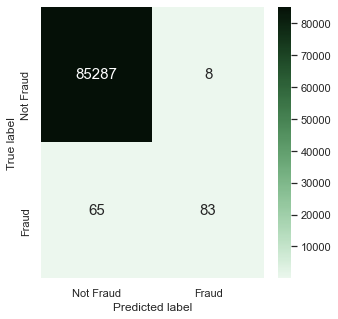

In [17]:
# Boosting

#####################
#Around 4-5 minutes!#
#####################

from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier(random_state=0)
gb.fit(X_train, y_train)
y_pred = gb.predict(X_test)
evaluate_model_prediction(y_test, y_pred)

More advanced tree models didn't performed so well, maybe they are too complicated for an unmbalanced dataset


    ----------------------------------------------------
    -Precision: 0.11723446893787576
    -Recall: 0.7905405405405406
    -F1 score: 0.2041884816753927
    ----------------------------------------------------
    
    Confusion matrix:


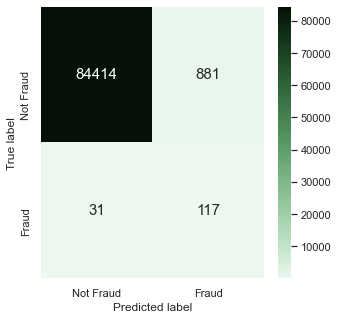

In [19]:
# Give more weight to the fraudolent class - optimized tree

dt = DecisionTreeClassifier(class_weight = "balanced")
best_params = param_grid[results.index[0]]
dt.set_params(**best_params)
dt.fit(X_train, y_train) #train the best configured tree on the entire train set
y_pred = dt.predict(X_test)
evaluate_model_prediction(y_test, y_pred)

More weight to the fraudolent class leads to lower precision without a good improvement in recall.

### 4.2 Alternative paradigms


    ----------------------------------------------------
    -Precision: 0.003385576968606468
    -Recall: 0.9662162162162162
    -F1 score: 0.006747510970603501
    ----------------------------------------------------
    
    Confusion matrix:


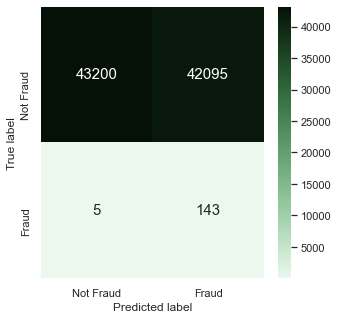

In [18]:
#One class SVM

# A method that estimate the support of the distribution of the data.
# We will estimate the distribution of genuine transactions and try to see if the fraudolent
# ones will fall outside of the estimated support, classifying those outliers as frauds.
# We will undersample the train set in order to get reasonable execution time.


###################
#Around 2 minutes!#
###################

from sklearn.svm import OneClassSVM

X_OneClassSVM_train = X_train[y_train == 0,:]
n = X_OneClassSVM_train.shape[0]
n_samples = 30000
selected = np.floor(np.random.random_sample(n_samples)*n)
selected = np.int64(selected)


X_OneClassSVM_train = X_OneClassSVM_train[selected,:]
oc_svm = OneClassSVM(max_iter = -1)
oc_svm.fit(X_OneClassSVM_train) # Gaussian kernel

y_pred = oc_svm.predict(X_test)
y_pred = [0 if y == 1 else 1 for y in y_pred]
evaluate_model_prediction(y_test, y_pred)

This approach doesn't work well in this situation.

### 5. **Neural networks** <a class="anchor" id="chapter5"></a>

In [20]:
# Import packages

from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

Let's tackle the problem using neural networks.

We started using a 2-layer NN (513 trainable parameters) and then add one more layer (677 trainable parameters).

Both models are built with 'sigmoid' activation function and are trained using 'cross entropy' as loss funtion.


The output of the model is the value of the final node, i.e. the node of the final layer.

As for any other nodes, it is a value in the continuous interval (0, 1). The bigger is the value, the higher is the probability to be dealing with a fraud.

We need to choose a threshold in order to flag the output as 'fraud' (i.e. 1) or 'not-fraud' (i.e. 0).

A proper threshold for a balanced dataset could be 0.5, but since we are dealing with unbalanced data we also apply lower threshold in order to be 'more sensitive' to the minority class (i.e. fraud).

In [21]:
# Create a 2-layers Neural Network 'NN_2'

# Input layer: nodes = 30
# First hidden layer: nodes = 16, activation function = 'sigmoid'
# Ssecond hidden layer: nodes = 1, activation function = 'sigmoid' 

NN_2 = Sequential()
NN_2.add(Dense(16, input_shape = X_train.shape[1:], activation ='sigmoid'))
NN_2.add(Dense(1, activation ='sigmoid'))

metrics = [keras.metrics.Precision(name='precision'),
        keras.metrics.Recall(name='recall'),
        keras.metrics.AUC(name='auc')]

# Loss function = 'cross entropy'
NN_2.compile(optimizer=keras.optimizers.Adam(lr=1e-3),
      loss=keras.losses.BinaryCrossentropy(),
      metrics=metrics)

NN_2.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                496       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 17        
Total params: 513
Trainable params: 513
Non-trainable params: 0
_________________________________________________________________


In [22]:
# Number of samples in the train set
n_train_samples = X_train.shape[0]

# Number of frauds in the train set
n_train_frauds = (y_train==1).sum()

# Choose batch_size big enough to have on average 3 frauds per batch
batch_size = 3 * (n_train_samples//n_train_frauds)

epochs = int(1.1 * (n_train_samples/batch_size))

print('The train process consists of {0} epochs and analizes {1} samples per epoch.'.format(epochs,batch_size))

The train process consists of 126 epochs and analizes 1737 samples per epoch.


In [23]:
# Train Neural Network 'NN_2'

train = NN_2.fit(X_train, y_train, batch_size=batch_size, epochs=epochs)

Epoch 1/126
115/115 [==============================] - 2s 5ms/step - loss: 0.3448 - precision: 0.1048 - recall: 0.5554 - auc: 0.9140
Epoch 2/126
115/115 [==============================] - 1s 4ms/step - loss: 0.1442 - precision: 0.8259 - recall: 0.3352 - auc: 0.9554
Epoch 3/126
115/115 [==============================] - 0s 4ms/step - loss: 0.0773 - precision: 0.8317 - recall: 0.4782 - auc: 0.9568
Epoch 4/126
115/115 [==============================] - 0s 4ms/step - loss: 0.0482 - precision: 0.8403 - recall: 0.6040 - auc: 0.9643
Epoch 5/126
115/115 [==============================] - 0s 4ms/step - loss: 0.0330 - precision: 0.8807 - recall: 0.7134 - auc: 0.9584
Epoch 6/126
115/115 [==============================] - 0s 4ms/step - loss: 0.0240 - precision: 0.8705 - recall: 0.7263 - auc: 0.9619
Epoch 7/126
115/115 [==============================] - 0s 4ms/step - loss: 0.0187 - precision: 0.8657 - recall: 0.7642 - auc: 0.9704
Epoch 8/126
115/115 [==============================] - 0s 4ms/step - 

115/115 [==============================] - 0s 4ms/step - loss: 0.0030 - precision: 0.8733 - recall: 0.8038 - auc: 0.9484
Epoch 63/126
115/115 [==============================] - 0s 4ms/step - loss: 0.0029 - precision: 0.8854 - recall: 0.8039 - auc: 0.9593
Epoch 64/126
115/115 [==============================] - 0s 4ms/step - loss: 0.0027 - precision: 0.8762 - recall: 0.8447 - auc: 0.9557
Epoch 65/126
115/115 [==============================] - 0s 4ms/step - loss: 0.0028 - precision: 0.8276 - recall: 0.8081 - auc: 0.9467
Epoch 66/126
115/115 [==============================] - 0s 4ms/step - loss: 0.0029 - precision: 0.8602 - recall: 0.7848 - auc: 0.9505
Epoch 67/126
115/115 [==============================] - 1s 4ms/step - loss: 0.0025 - precision: 0.8710 - recall: 0.8397 - auc: 0.9692
Epoch 68/126
115/115 [==============================] - 0s 4ms/step - loss: 0.0030 - precision: 0.8554 - recall: 0.8196 - auc: 0.9451
Epoch 69/126
115/115 [==============================] - 0s 4ms/step - loss:

115/115 [==============================] - 0s 4ms/step - loss: 0.0024 - precision: 0.8873 - recall: 0.7804 - auc: 0.9494
Epoch 124/126
115/115 [==============================] - 0s 4ms/step - loss: 0.0021 - precision: 0.9159 - recall: 0.8526 - auc: 0.9618
Epoch 125/126
115/115 [==============================] - 0s 4ms/step - loss: 0.0019 - precision: 0.9098 - recall: 0.8397 - auc: 0.9752
Epoch 126/126
115/115 [==============================] - 0s 4ms/step - loss: 0.0021 - precision: 0.8896 - recall: 0.8177 - auc: 0.9661


In [24]:
# Get the predicted features from the test set
y_pred_NN2 = NN_2.predict(X_test)

# Use 3 different thresholds for the classification of the output: 0.5, 0.2, 0.1
y_predicted_NN2_05 = 1.0 * (y_pred_NN2>0.5)
y_predicted_NN2_02 = 1.0 * (y_pred_NN2>0.2)
y_predicted_NN2_01 = 1.0 * (y_pred_NN2>0.1)


    ----------------------------------------------------
    -Precision: 0.9016393442622951
    -Recall: 0.7432432432432432
    -F1 score: 0.8148148148148148
    ----------------------------------------------------
    
    Confusion matrix:


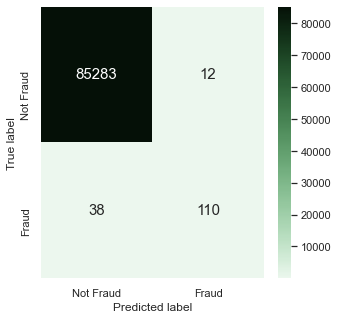

In [25]:
# Threshold 0.5

evaluate_model_prediction(y_test, y_predicted_NN2_05)


    ----------------------------------------------------
    -Precision: 0.8455882352941176
    -Recall: 0.777027027027027
    -F1 score: 0.8098591549295775
    ----------------------------------------------------
    
    Confusion matrix:


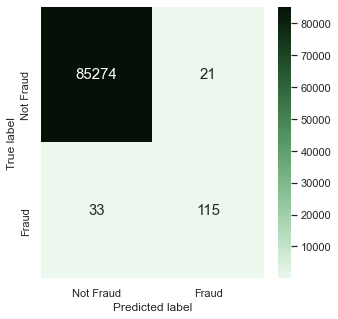

In [26]:
# Threshold 0.2

evaluate_model_prediction(y_test, y_predicted_NN2_02)


    ----------------------------------------------------
    -Precision: 0.7908496732026143
    -Recall: 0.8175675675675675
    -F1 score: 0.8039867109634551
    ----------------------------------------------------
    
    Confusion matrix:


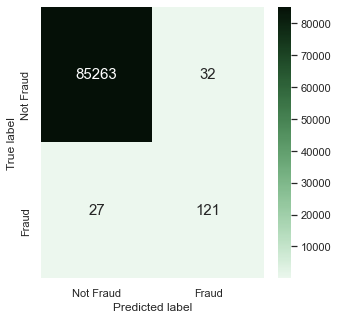

In [27]:
# Threshold 0.1

evaluate_model_prediction(y_test, y_predicted_NN2_01)

This first NN model results in a pretty high recall (up to 80% with threshold 0.1), without loosing that much in precision (from 90% down to 70%).

Let'see now if the scores get better adding a new layer.

In [28]:
# Create a 3-layers Neural Network 'NN_3'

# Input layer: nodes = 30
# First hidden layer: nodes = 16, activation function = 'sigmoid'
# Second hidden layer: nodes = 10, activation function = 'sigmoid'
# Second hidden layer: nodes = 1, activation function = 'sigmoid' 

NN_3 = Sequential()
NN_3.add(Dense(16, input_shape = X_train.shape[1:], activation ='sigmoid'))
NN_3.add(Dense(10, activation ='sigmoid'))
NN_3.add(Dense(1, activation ='sigmoid'))

metrics = [keras.metrics.Precision(name='precision'),
        keras.metrics.Recall(name='recall'),
        keras.metrics.AUC(name='auc')]

# Loss function = 'cross entropy'
NN_3.compile(optimizer=keras.optimizers.Adam(lr=1e-3),
      loss=keras.losses.BinaryCrossentropy(),
      metrics=metrics)

NN_3.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 16)                496       
_________________________________________________________________
dense_3 (Dense)              (None, 10)                170       
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 11        
Total params: 677
Trainable params: 677
Non-trainable params: 0
_________________________________________________________________


In [29]:
# Train Neural Network 'NN_3'

train = NN_3.fit(X_train, y_train, batch_size=batch_size, epochs=epochs)

Epoch 1/126
115/115 [==============================] - 2s 5ms/step - loss: 0.2837 - precision: 0.0000e+00 - recall: 0.0000e+00 - auc: 0.5282
Epoch 2/126
115/115 [==============================] - 1s 4ms/step - loss: 0.0925 - precision: 0.0000e+00 - recall: 0.0000e+00 - auc: 0.9241
Epoch 3/126
115/115 [==============================] - 0s 4ms/step - loss: 0.0481 - precision: 0.0000e+00 - recall: 0.0000e+00 - auc: 0.9474
Epoch 4/126
115/115 [==============================] - 0s 4ms/step - loss: 0.0314 - precision: 0.0000e+00 - recall: 0.0000e+00 - auc: 0.9575
Epoch 5/126
115/115 [==============================] - 0s 4ms/step - loss: 0.0229 - precision: 0.0000e+00 - recall: 0.0000e+00 - auc: 0.9620
Epoch 6/126
115/115 [==============================] - 0s 4ms/step - loss: 0.0186 - precision: 0.0000e+00 - recall: 0.0000e+00 - auc: 0.9625
Epoch 7/126
115/115 [==============================] - 0s 4ms/step - loss: 0.0155 - precision: 0.0000e+00 - recall: 0.0000e+00 - auc: 0.9393
Epoch 8/126
1

115/115 [==============================] - 1s 4ms/step - loss: 0.0025 - precision: 0.8420 - recall: 0.8564 - auc: 0.9675
Epoch 60/126
115/115 [==============================] - 1s 4ms/step - loss: 0.0028 - precision: 0.8198 - recall: 0.8274 - auc: 0.9557
Epoch 61/126
115/115 [==============================] - 1s 4ms/step - loss: 0.0024 - precision: 0.8548 - recall: 0.8322 - auc: 0.9716
Epoch 62/126
115/115 [==============================] - 1s 4ms/step - loss: 0.0028 - precision: 0.8571 - recall: 0.8115 - auc: 0.9613
Epoch 63/126
115/115 [==============================] - 1s 4ms/step - loss: 0.0030 - precision: 0.8159 - recall: 0.8237 - auc: 0.9509
Epoch 64/126
115/115 [==============================] - 0s 4ms/step - loss: 0.0025 - precision: 0.8592 - recall: 0.8311 - auc: 0.9601
Epoch 65/126
115/115 [==============================] - 1s 4ms/step - loss: 0.0026 - precision: 0.8729 - recall: 0.8189 - auc: 0.9559
Epoch 66/126
115/115 [==============================] - 1s 4ms/step - loss:

115/115 [==============================] - 0s 4ms/step - loss: 0.0020 - precision: 0.8893 - recall: 0.8341 - auc: 0.9660
Epoch 121/126
115/115 [==============================] - 0s 4ms/step - loss: 0.0023 - precision: 0.9027 - recall: 0.8587 - auc: 0.9621
Epoch 122/126
115/115 [==============================] - 1s 4ms/step - loss: 0.0016 - precision: 0.9296 - recall: 0.9132 - auc: 0.9764
Epoch 123/126
115/115 [==============================] - 1s 4ms/step - loss: 0.0022 - precision: 0.9103 - recall: 0.8335 - auc: 0.9666
Epoch 124/126
115/115 [==============================] - 1s 4ms/step - loss: 0.0018 - precision: 0.8837 - recall: 0.8462 - auc: 0.9718
Epoch 125/126
115/115 [==============================] - 0s 4ms/step - loss: 0.0019 - precision: 0.9165 - recall: 0.8644 - auc: 0.9709
Epoch 126/126
115/115 [==============================] - 1s 4ms/step - loss: 0.0020 - precision: 0.9055 - recall: 0.8697 - auc: 0.9613


In [30]:
# Get the predicted features from the test set
y_pred_NN3 = NN_3.predict(X_test)

# Use 3 different thresholds for the classification of the output: 0.5, 0.2, 0.1
y_predicted_NN3_05 = 1.0 * (y_pred_NN3>0.5)
y_predicted_NN3_02 = 1.0 * (y_pred_NN3>0.2)
y_predicted_NN3_01 = 1.0 * (y_pred_NN3>0.1)


    ----------------------------------------------------
    -Precision: 0.8549618320610687
    -Recall: 0.7567567567567568
    -F1 score: 0.8028673835125448
    ----------------------------------------------------
    
    Confusion matrix:


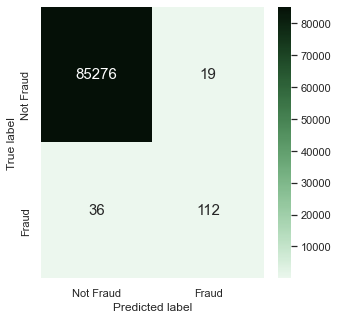

In [31]:
# Threshold 0.5

evaluate_model_prediction(y_test, y_predicted_NN3_05)


    ----------------------------------------------------
    -Precision: 0.7814569536423841
    -Recall: 0.7972972972972973
    -F1 score: 0.7892976588628762
    ----------------------------------------------------
    
    Confusion matrix:


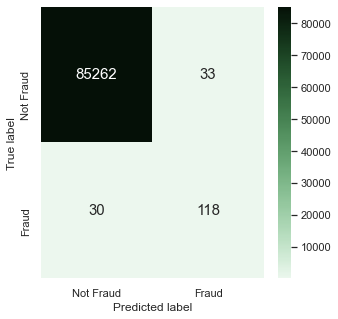

In [32]:
# Threshold 0.2

evaluate_model_prediction(y_test, y_predicted_NN3_02)


    ----------------------------------------------------
    -Precision: 0.7017543859649122
    -Recall: 0.8108108108108109
    -F1 score: 0.7523510971786834
    ----------------------------------------------------
    
    Confusion matrix:


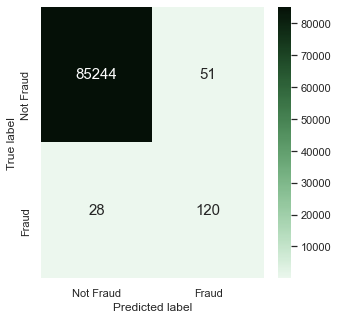

In [33]:
# Threshold 0.1

evaluate_model_prediction(y_test, y_predicted_NN3_01)

Even if we added 164 learnable parameters, the second NN model doesn't perform that different from the former one.

Precision and recall are more or less the same.

### 6. Conclusions <a class="anchor" id="chapter6"></a>